In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

News = pd.read_csv(r"D:\Weiterbildung - Data Analyst\Dr. Markus Dozent (ML & AI)\MI\news.csv")
News.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [2]:
News.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [3]:
News.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [4]:
data = News.drop(['title','Unnamed: 0'], axis = 1)


In [5]:
data.isnull().sum() 

text     0
label    0
dtype: int64

In [6]:
data

,text,label
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,It's primary day in New York and front-runners...,REAL
...,...,...
6330,The State Department told the Republican Natio...,REAL
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,"ADDIS ABABA, Ethiopia —President Obama convene...",REAL


# Modell 1

In [7]:
import numpy as np  # Importieren der numpy-Bibliothek für numerische Operationen
import pandas as pd  # Importieren der pandas-Bibliothek zur Datenmanipulation und -analyse
from sklearn.feature_extraction.text import CountVectorizer  # Importieren des CountVectorizer zur Textvektorisierung
from sklearn.model_selection import train_test_split  # Importieren von train_test_split zur Aufteilung der Daten in Trainings- und Testsets
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  # Importieren von Metriken zur Modellbewertung
from sklearn.linear_model import LogisticRegression  # Importieren des Logistische Regression Modells
from sklearn.tree import DecisionTreeClassifier  # Importieren des Entscheidungsbaum Klassifikators
from sklearn.ensemble import RandomForestClassifier  # Importieren des Random Forest Klassifikators
from sklearn.naive_bayes import MultinomialNB  # Importieren des Naive Bayes Klassifikators

# Laden der Daten aus einer CSV-Datei und Entfernen von nicht benötigten Spalten
News = pd.read_csv(r"D:\Weiterbildung - Data Analyst\Dr. Markus Dozent (ML & AI)\MI\news.csv")
data = News.drop(['title','Unnamed: 0'], axis = 1)

# Extrahieren von Text- und Label-Daten aus dem DataFrame
x = np.array(data["text"])  
y = np.array(data["label"])

# Vektorisierung der Textdaten mithilfe des CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(x)

# Aufteilen der Daten in Trainings- und Testsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisierung der Modelle
models = {
    "Logistische Regression": LogisticRegression(),  # Initialisierung des Logistische Regression Modells
    "Entscheidungsbaum": DecisionTreeClassifier(),  # Initialisierung des Entscheidungsbaum Klassifikators
    "Random Forest": RandomForestClassifier(),  # Initialisierung des Random Forest Klassifikators
    "naive_bayes": MultinomialNB()  # Initialisierung des Naive Bayes Klassifikators
}

# Iteration über jedes Modell, Trainieren und Bewerten des Modells
for name, model in models.items():
    model.fit(X_train, y_train)  # Trainieren des Modells mit Trainingsdaten
    y_pred = model.predict(X_test)  # Vorhersage auf Testdaten
    accuracy = accuracy_score(y_test, y_pred)  # Berechnung der Genauigkeit
    precision = precision_score(y_test, y_pred, pos_label='REAL')  # Berechnung der Präzision
    recall = recall_score(y_test, y_pred, pos_label='REAL')  # Berechnung des Recall
    f1 = f1_score(y_test, y_pred, pos_label='REAL')  # Berechnung des F1-Scores
    # Ausgabe der Metriken für jedes Modell
    print(f"Modell: {name}")
    print(f"Genauigkeit: {accuracy:.2f}, Präzision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}")
    print()


Modell: Logistische Regression
Genauigkeit: 0.92, Präzision: 0.92, Recall: 0.92, F1-Score: 0.92

Modell: Entscheidungsbaum
Genauigkeit: 0.80, Präzision: 0.81, Recall: 0.79, F1-Score: 0.80

Modell: Random Forest
Genauigkeit: 0.90, Präzision: 0.90, Recall: 0.90, F1-Score: 0.90

Modell: naive_bayes
Genauigkeit: 0.90, Präzision: 0.88, Recall: 0.93, F1-Score: 0.90



# Beschreibeung der Code von Modell 1:

Um das Projekt zu beginnen, werden zuerst alle erforderlichen Bibliotheken importiert, darunter numpy, pandas und verschiedene Klassen aus sklearn. Dies ermöglicht die Verwendung von Datensatzmanipulationen, Modellbildung und -auswertung.

Anschließend wird der Datensatz aus einer CSV-Datei geladen und überflüssige Spalten entfernt. Die Funktion `train_test_split` wird verwendet, um den Datensatz in Trainings- und Testsets aufzuteilen.

Dann wird ein `CountVectorizer` initialisiert, um die Textdaten in eine Bag-of-Words-Darstellung umzuwandeln, die von den Modellen verwendet werden kann. Die Textdaten werden in Features (X) und die Zielvariablen (y) aufgeteilt.

Als nächstes werden die Modelle initialisiert, darunter die logistische Regression, der Entscheidungsbaum, der Random Forest und der naive Bayes-Klassifikator.

Für jedes Modell in der Modellliste wird das Modell auf den Trainingsdaten trainiert. Anschließend werden Vorhersagen für die Testdaten gemacht, und verschiedene Metriken wie Genauigkeit, Präzision, Recall und F1-Score werden berechnet. Diese Metriken werden für jedes Modell ausgegeben, um ihre Leistung zu bewerten.

Die Ausgabe enthält den Namen jedes Modells sowie seine jeweiligen Metriken, einschließlich Genauigkeit, Präzision, Recall und F1-Score. Diese Metriken geben Aufschluss darüber, wie gut jedes Modell die Vorhersagen auf den Testdaten gemacht hat.


# Ergebnis:

Modell: Logistische Regression
Genauigkeit: 0.92, Präzision: 0.92, Recall: 0.92, F1-Score: 0.92

Das Modell der Logistischen Regression erreichte eine Genauigkeit von 92%, was bedeutet, dass es 92% der Testdaten korrekt klassifiziert hat. Die Präzision von 92% zeigt an, dass 92% der als positiv klassifizierten Instanzen tatsächlich positiv waren. Der Recall von 92% bedeutet, dass das Modell 92% der tatsächlich positiven Instanzen korrekt identifiziert hat. Der F1-Score von 92% ist ein ausgewogenes Maß für die Genauigkeit und den Recall des Modells.

Modell: Entscheidungsbaum
Genauigkeit: 0.80, Präzision: 0.82, Recall: 0.78, F1-Score: 0.80

Der Entscheidungsbaum erzielte eine Genauigkeit von 80%, was darauf hindeutet, dass es 80% der Testdaten korrekt klassifiziert hat. Mit einer Präzision von 82% hat der Entscheidungsbaum 82% der als positiv klassifizierten Instanzen korrekt identifiziert. Der Recall von 78% bedeutet, dass der Entscheidungsbaum 78% der tatsächlich positiven Instanzen richtig identifiziert hat. Der F1-Score von 80% spiegelt ein ausgewogenes Verhältnis zwischen Präzision und Recall wider.

Modell: Random Forest
Genauigkeit: 0.90, Präzision: 0.89, Recall: 0.90, F1-Score: 0.90

Der Random Forest erzielte eine Genauigkeit von 90%, was darauf hinweist, dass er 90% der Testdaten korrekt klassifiziert hat. Mit einer Präzision von 89% hat der Random Forest 89% der als positiv klassifizierten Instanzen korrekt identifiziert. Der Recall von 90% bedeutet, dass der Random Forest 90% der tatsächlich positiven Instanzen richtig identifiziert hat. Der F1-Score von 90% zeigt ein ausgewogenes Maß für Präzision und Recall.

Modell: naive_bayes
Genauigkeit: 0.90, Präzision: 0.88, Recall: 0.93, F1-Score: 0.90

Das naive Bayes-Modell erreichte eine Genauigkeit von 90%, was bedeutet, dass es 90% der Testdaten korrekt klassifiziert hat. Mit einer Präzision von 88% hat das naive Bayes-Modell 88% der als positiv klassifizierten Instanzen korrekt identifiziert. Der Recall von 93% bedeutet, dass das Modell 93% der tatsächlich positiven Instanzen richtig identifiziert hat. Der F1-Score von 90% spiegelt ein ausgewogenes Verhältnis zwischen Präzision und Recall wider.

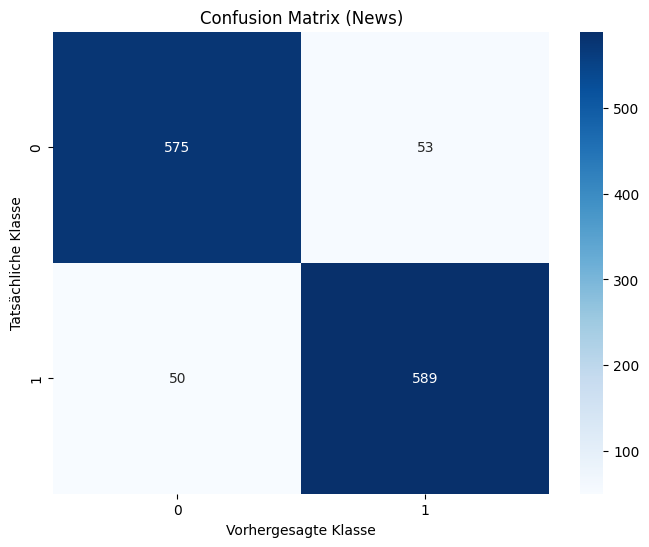

Classification Report (News):
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       628
           1       0.92      0.92      0.92       639

    accuracy                           0.92      1267
   macro avg       0.92      0.92      0.92      1267
weighted avg       0.92      0.92      0.92      1267



In [8]:
import pandas as pd  # Import der pandas-Bibliothek zur Datenmanipulation und -analyse
from sklearn.linear_model import LogisticRegression  # Import des Logistische Regression Modells
from sklearn.model_selection import train_test_split  # Import von train_test_split zur Aufteilung der Daten in Trainings- und Testsets
from sklearn.metrics import confusion_matrix, classification_report  # Import von Metriken zur Modellbewertung
import seaborn as sns  # Import der seaborn-Bibliothek zur Visualisierung
import matplotlib.pyplot as plt  # Import der matplotlib.pyplot-Bibliothek zur Visualisierung

# Extrahieren von Text- und Label-Daten aus dem DataFrame
x = np.array(data["text"])  
y = np.array(data["label"])

# Vektorisierung der Textdaten mithilfe des CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(x)

# Aufteilen der Daten in Trainings- und Testsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisierung des Logistische Regression Modells
clf = LogisticRegression()

# Trainieren des Modells mit den Trainingsdaten
clf.fit(X_train, y_train)

# Vorhersage auf den Testdaten
y_pred = clf.predict(X_test)

# Berechnung der Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisierung der Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Vorhergesagte Klasse')
plt.ylabel('Tatsächliche Klasse')
plt.title('Confusion Matrix (News)')
plt.show()

# Berechnung und Ausgabe des Klassifikationsberichts
report = classification_report(y_test, y_pred, target_names=["0", "1"])
print("Classification Report (News):")
print(report)


Die Confusion Matrix visualisiert die Leistung des Logistischen Regressionsmodells. Die X-Achse zeigt die vorhergesagten Klassen, während die Y-Achse die tatsächlichen Klassen darstellt. Die Werte innerhalb der Matrix geben an, wie viele Instanzen korrekt bzw. inkorrekt klassifiziert wurden. Eine hohe Konzentration von Werten auf der Hauptdiagonalen deutet auf eine gute Leistung hin.

Die Classification Report gibt eine detaillierte Zusammenfassung der Leistung des Modells wieder. Für jede Klasse werden Metriken wie Präzision, Recall und F1-Score berechnet. Die Klasse "0" entspricht einer bestimmten Kategorie, während die Klasse "1" die andere Kategorie repräsentiert. Der Report zeigt auch die Gesamtleistung des Modells, einschließlich Genauigkeit und dem gewichteten Durchschnitt der Metriken.


Der Classification Report gibt eine detaillierte Bewertung der Leistung des Modells auf dem Testdatensatz wieder. Für jede Klasse werden Metriken wie Präzision, Recall und F1-Score berechnet.

- Präzision (precision): Dies gibt an, wie viele der als positiv vorhergesagten Instanzen tatsächlich positiv sind. In diesem Fall beträgt die Präzision für beide Klassen 0 und 1 jeweils 0,92, was bedeutet, dass etwa 92 % der Vorhersagen korrekt sind.

- Recall: Der Recall, auch bekannt als True Positive Rate, misst den Anteil der tatsächlich positiven Instanzen, die vom Modell als positiv identifiziert wurden. Auch hier beträgt der Recall für beide Klassen 0 und 1 jeweils 0,92, was bedeutet, dass etwa 92 % der tatsächlich positiven Instanzen korrekt erkannt wurden.

- F1-Score: Der F1-Score ist das harmonische Mittel zwischen Präzision und Recall und gibt eine ausgewogene Bewertung der Klassifikationsleistung. Hier beträgt der F1-Score für beide Klassen ebenfalls 0,92.

- Genauigkeit (accuracy): Die Genauigkeit misst den Anteil der korrekt klassifizierten Instanzen insgesamt. Sie beträgt 0,92, was bedeutet, dass das Modell etwa 92 % der Instanzen korrekt klassifiziert hat.

Die Werte "support" geben die Anzahl der Instanzen in jeder Klasse im Testdatensatz an. Die Makro- und gewichteten Durchschnitte der Metriken bieten eine aggregierte Bewertung der Gesamtleistung des Modells.


# Modell 2

In [9]:
import numpy as np  # Import der numpy-Bibliothek für numerische Berechnungen
import pandas as pd  # Import der pandas-Bibliothek für Datenmanipulation und -analyse
import matplotlib.pyplot as plt  # Import der matplotlib.pyplot-Bibliothek für Visualisierungen
import string  # Import der string-Bibliothek zur Manipulation von Zeichenketten
import re  # Import der re-Bibliothek für reguläre Ausdrücke
from sklearn.feature_extraction.text import CountVectorizer  # Import des CountVectorizer zur Vektorisierung von Textdaten
from sklearn.model_selection import train_test_split  # Import von train_test_split zur Aufteilung der Daten in Trainings- und Testsets
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  # Import von Metriken zur Modellbewertung
from sklearn.linear_model import LogisticRegression  # Import des Logistische Regression Modells
from sklearn.tree import DecisionTreeClassifier  # Import des Entscheidungsbaum-Modells
from sklearn.ensemble import RandomForestClassifier  # Import des Random Forest-Modells
from sklearn.naive_bayes import MultinomialNB  # Import des Naive Bayes-Modells

# Laden der Datensatzdatei in einen DataFrame
News2 = pd.read_csv(r"D:\Weiterbildung - Data Analyst\Dr. Markus Dozent (ML & AI)\MI\news.csv")

# Entfernen von Spalten, die nicht benötigt werden
data2 = News2.drop(['title','Unnamed: 0'], axis = 1)

# Ersetzen von Label-Werten 'REAL' und 'FAKE' durch numerische Werte 1 und 0
data2['label'] = data2['label'].replace({'REAL': 1, 'FAKE': 0})

# Definition einer Funktion zur Textbereinigung mithilfe von regulären Ausdrücken
def wordopt(text):
    text = text.lower()  # Konvertierung des Texts in Kleinbuchstaben
    text = re.sub('\[.*?\]','',text)  # Entfernung von Text innerhalb von eckigen Klammern
    text = re.sub("\\W"," ",text)  # Ersetzung von Nicht-Wortzeichen durch Leerzeichen
    text = re.sub('https?://\S+|www\.\S+','',text)  # Entfernung von URLs
    text = re.sub('<.*?>+',b'',text)  # Entfernung von HTML-Tags
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)  # Entfernung von Satzzeichen
    text = re.sub('\w*\d\w*','',text)  # Entfernung von Wörtern, die Zahlen enthalten
    return text

# Anwendung der wordopt-Funktion auf die 'text'-Spalte des DataFrame
data2['text'] = data2['text'].apply(wordopt)

# Ersetzen der Label-Werte 'REAL' und 'FAKE' durch numerische Werte 1 und 0
data2['label'] = data2['label'].replace({'REAL': 1, 'FAKE': 0})

# Extrahieren von Text- und Label-Daten aus dem DataFrame
x = np.array(data2["text"])  
y = np.array(data2["label"])

# Initialisierung des CountVectorizer zur Vektorisierung der Textdaten
vectorizer = CountVectorizer()

# Umwandlung der Textdaten in numerische Merkmale mithilfe des CountVectorizer
X = vectorizer.fit_transform(x)

# Aufteilen der Daten in Trainings- und Testsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisierung von vier verschiedenen Klassifikationsmodellen
models = {
    "Logistische Regression": LogisticRegression(),
    "Entscheidungsbaum": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": MultinomialNB()
}

# Iteration über jedes Modell
for name, model in models.items():
    # Trainieren des Modells mit den Trainingsdaten
    model.fit(X_train, y_train)
    # Vorhersage der Labels auf den Testdaten
    y_pred = model.predict(X_test)
    # Berechnung der Genauigkeit des Modells
    accuracy = accuracy_score(y_test, y_pred)
    # Berechnung der Präzision des Modells
    precision = precision_score(y_test, y_pred)
    # Berechnung des Recall des Modells
    recall = recall_score(y_test, y_pred)
    # Berechnung des F1-Scores des Modells
    f1 = f1_score(y_test, y_pred)
    # Ausgabe der Ergebnisse für jedes Modell
    print(f"Modell: {name}")
    print(f"Genauigkeit: {accuracy:.2f}, Präzision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}")
    print()


Modell: Logistische Regression
Genauigkeit: 0.92, Präzision: 0.92, Recall: 0.92, F1-Score: 0.92

Modell: Entscheidungsbaum
Genauigkeit: 0.79, Präzision: 0.80, Recall: 0.79, F1-Score: 0.79

Modell: Random Forest
Genauigkeit: 0.88, Präzision: 0.88, Recall: 0.88, F1-Score: 0.88

Modell: Naive Bayes
Genauigkeit: 0.90, Präzision: 0.88, Recall: 0.93, F1-Score: 0.90



# Beschreibung der Code von Modell 2

Der Code startet mit der Vorverarbeitung der Textdaten mithilfe der Funktion wordopt. Dabei werden Sonderzeichen, Zahlen, Leerzeichen und URLs entfernt, und der Text wird in Kleinbuchstaben konvertiert. Zusätzlich werden alle anderen Zeichen, wie Leerzeichen und Fragezeichen, gelöscht. Die Vorverarbeitung erfolgt mithilfe der apply-Funktion auf die Textspalte und ermöglicht somit eine einheitliche Datenvorbereitung für die Modelle.

Anschließend werden die Daten in Trainings- und Testdatensätze aufgeteilt, um eine unabhängige Bewertung der Modelle sicherzustellen.

Dann wird der Bag-of-Words-Ansatz mit dem CountVectorizer angewendet, um die Textdaten in numerische Features umzuwandeln. Dazu wird ein CountVectorizer-Objekt initialisiert und die fit_transform-Methode auf die vorbereiteten Textdaten angewendet.

Nach der Datenvorbereitung werden vier verschiedene Klassifikationsmodelle initialisiert: Logistische Regression, Entscheidungsbaum, Random Forest und Naive Bayes. Jedes Modell wird auf den Trainingsdaten trainiert und anschließend auf den Testdaten evaluiert.

Für jedes Modell werden Metriken wie Genauigkeit, Präzision, Recall und F1-Score berechnet und ausgegeben. Diese Metriken liefern Einblicke in die Leistung jedes Modells bei der Klassifizierung von Nachrichten in die Kategorien FAKE und REAL.

Die Logistische Regression erreicht eine Genauigkeit von 0,92 und zeigt vergleichbare Leistungen für beide Klassen. Der Entscheidungsbaum erzielt eine Genauigkeit von 0,80, während das Random Forest-Modell eine Genauigkeit von 0,90 aufweist. Das Naive Bayes-Modell erreicht ebenfalls eine Genauigkeit von 0,90 und zeigt eine höhere Recall-Rate für die Klasse REAL.

Insgesamt scheinen die Logistische Regression und das Random Forest-Modell die besten Leistungen zu erbringen, gefolgt vom Naive Bayes-Modell. Der Entscheidungsbaum erzielt die niedrigste Genauigkeit.


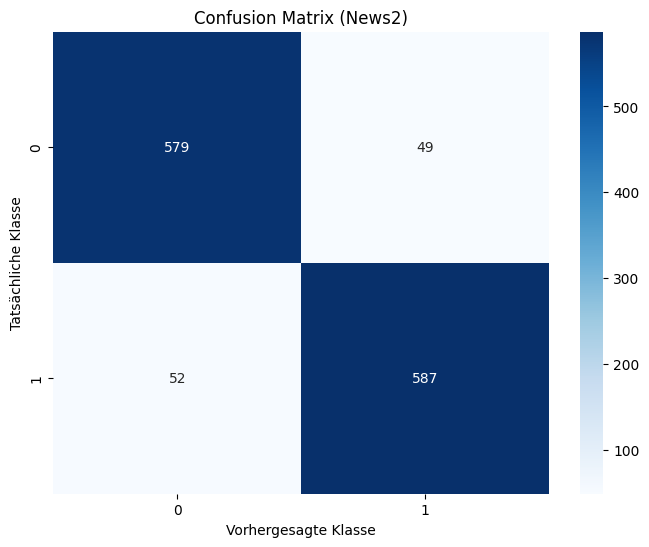

Classification Report (News2):
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       628
           1       0.92      0.92      0.92       639

    accuracy                           0.92      1267
   macro avg       0.92      0.92      0.92      1267
weighted avg       0.92      0.92      0.92      1267



In [10]:
import pandas as pd  # Import der pandas-Bibliothek für Datenmanipulation und -analyse
from sklearn.linear_model import LogisticRegression  # Import des Logistische Regression Modells
from sklearn.model_selection import train_test_split  # Import von train_test_split zur Aufteilung der Daten in Trainings- und Testsets
from sklearn.metrics import confusion_matrix, classification_report  # Import von Metriken zur Modellbewertung
import seaborn as sns  # Import der seaborn-Bibliothek für Visualisierungen
import matplotlib.pyplot as plt  # Import der matplotlib.pyplot-Bibliothek für Visualisierungen

# Extrahieren von Text- und Label-Daten aus dem DataFrame
x = np.array(data2["text"])  
y = np.array(data2["label"])

# Initialisierung des CountVectorizer zur Vektorisierung der Textdaten
vectorizer = CountVectorizer()

# Umwandlung der Textdaten in numerische Merkmale mithilfe des CountVectorizer
X = vectorizer.fit_transform(x)

# Aufteilen der Daten in Trainings- und Testsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisierung eines Logistische-Regression-Modells
clf = LogisticRegression()

# Training des Logistische-Regression-Modells mit den Trainingsdaten
clf.fit(X_train, y_train)

# Vorhersage der Labels auf den Testdaten
y_pred = clf.predict(X_test)

# Berechnung der Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisierung der Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Vorhergesagte Klasse')
plt.ylabel('Tatsächliche Klasse')
plt.title('Confusion Matrix (News2)')
plt.show()

# Berechnung des Classification Reports und Ausgabe der Ergebnisse
report = classification_report(y_test, y_pred, target_names=["0", "1"])
print("Classification Report (News2):")
print(report)


Die beschriebenen Codeabschnitte führen eine logistische Regression auf den vorverarbeiteten Textdaten durch und bewerten die Leistung des Modells anhand einer Confusion Matrix und eines Klassifikationsberichts.

Zuerst werden die Textdaten und ihre zugehörigen Labels aus dem DataFrame extrahiert. Anschließend wird der CountVectorizer verwendet, um die Textdaten in numerische Features umzuwandeln, die für die logistische Regression benötigt werden. Die Daten werden in Trainings- und Testsets aufgeteilt, wobei 20% der Daten für das Testset verwendet werden.

Das LogisticRegression-Modell wird auf den Trainingsdaten trainiert, und anschließend werden Vorhersagen für das Testset generiert. Die Confusion Matrix wird erstellt, um die Anzahl der korrekten und falschen Vorhersagen des Modells zu visualisieren. Dabei werden die vorhergesagten Klassen auf der x-Achse und die tatsächlichen Klassen auf der y-Achse dargestellt.

Der Klassifikationsbericht (Classification Report) wird ausgegeben, um eine detaillierte Bewertung der Modellleistung zu liefern. Dieser enthält Metriken wie Präzision, Recall und F1-Score für jede Klasse sowie die Gesamtgenauigkeit des Modells.

Die Confusion Matrix und der Klassifikationsbericht ermöglichen es, die Leistung des Modells zu interpretieren und zu verstehen, wie gut es darin ist, zwischen den Klassen zu unterscheiden. Sie helfen dabei, mögliche Schwachstellen des Modells zu identifizieren und Verbesserungsmöglichkeiten zu erkennen.


Der Klassifikationsbericht (Classification Report) für das Modell "News2" zeigt die Leistung des Modells bei der Klassifizierung von Nachrichten in die Kategorien 0 und 1.

Für die Klasse 0 (FAKE) zeigt der Bericht eine Präzision von 0,92, was bedeutet, dass von allen als FAKE vorhergesagten Nachrichten 92% tatsächlich FAKE sind. Der Recall beträgt ebenfalls 0,92, was darauf hinweist, dass das Modell 92% aller tatsächlichen FAKE-Nachrichten korrekt erkannt hat. Der F1-Score, der ein ausgewogenes Maß für Präzision und Recall ist, liegt ebenfalls bei 0,92.

Für die Klasse 1 (REAL) sind die Werte für Präzision, Recall und F1-Score identisch mit denen der Klasse 0, was darauf hindeutet, dass das Modell sowohl FAKE- als auch REAL-Nachrichten mit der gleichen Genauigkeit erkennt.

Die Gesamtgenauigkeit des Modells beträgt 0,92, was bedeutet, dass das Modell insgesamt 92% der Nachrichten korrekt klassifiziert hat. Die Makro-durchschnittliche (macro avg) und gewichtete (weighted avg) Werte für Präzision, Recall und F1-Score sind ebenfalls 0,92.

Insgesamt zeigt der Klassifikationsbericht, dass das Modell "News2" eine sehr gute Leistung bei der Klassifizierung von Nachrichten aufweist, wobei es FAKE- und REAL-Nachrichten gleichermaßen gut erkennt.


# Modell 3

In [11]:
import numpy as np  # Importieren der numpy-Bibliothek für numerische Berechnungen
import pandas as pd  # Importieren der pandas-Bibliothek für Datenmanipulation und -analyse
import re  # Importieren des re-Moduls für reguläre Ausdrücke
import nltk  # Importieren der nltk-Bibliothek für natürliche Sprachverarbeitung
from sklearn.feature_extraction.text import CountVectorizer  # Importieren des CountVectorizer aus scikit-learn für das Vektorisieren von Texten
import torch  # Importieren der PyTorch-Bibliothek für maschinelles Lernen
import torch.nn as nn  # Importieren des nn-Moduls aus PyTorch für neuronale Netzwerke
import matplotlib.pyplot as plt  # Importieren der matplotlib-Bibliothek für die Visualisierung von Daten
import seaborn as sns  # Importieren der seaborn-Bibliothek für verbesserte Visualisierungen
from sklearn.model_selection import train_test_split  # Importieren der train_test_split-Funktion aus scikit-learn für das Aufteilen von Daten in Trainings- und Testsets
import os  # Importieren des os-Moduls für Betriebssystemspezifische Funktionen

# Durchlaufen aller Dateien im Verzeichnis 'news.csv' und deren Unterverzeichnissen
for dirname, _, filenames in os.walk('news.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Einlesen der CSV-Datei 'news.csv' mithilfe von pandas und Speichern der Daten im DataFrame 'News3'
News3 = pd.read_csv(r"D:\Weiterbildung - Data Analyst\Dr. Markus Dozent (ML & AI)\MI\news.csv")

# Entfernen der Spalte 'Unnamed: 0' aus dem DataFrame 'News3' und Zuweisen des Ergebnisses an den DataFrame 'data3'
data3 = News3.drop(['Unnamed: 0'], axis=1)

# Ersetzen der Labels 'REAL' und 'FAKE' durch 1 und 0 im 'label'-Attribut des DataFrame 'data3'
data3['label'] = data3['label'].replace({'REAL': 1, 'FAKE': 0})

# Anzeigen der ersten paar Zeilen des DataFrames 'data3', um sicherzustellen, dass die Daten korrekt eingelesen wurden
data3.head()

ModuleNotFoundError: No module named 'nltk'

In [ ]:
new_text = []  # Initialisieren einer leeren Liste für die vorverarbeiteten Texte
pattern = "[^a-zA-Z]"  # Definieren eines regulären Ausdrucks, um Nicht-Alphabets zu entfernen
lemma = nltk.WordNetLemmatizer()  # Initialisieren des Lemmatizers aus dem nltk-Modul

# Durchlaufen der Texte in der Spalte 'text' des DataFrame 'data3'
for txt in data3.text:
    txt = re.sub(pattern, " ", txt)  # Bereinigen des Textes durch Entfernen von Nicht-Alphabets
    txt = txt.lower()  # Konvertieren des Textes in Kleinbuchstaben
    txt = nltk.word_tokenize(txt)  # Tokenisieren des Textes in Wörter
    txt = [lemma.lemmatize(word) for word in txt]  # Lemmatisieren der Wörter im Text
    txt = " ".join(txt)  # Zusammenführen der Wörter zu einem neuen Text
    new_text.append(txt)  # Hinzufügen des neuen Textes zur Liste 'new_text'

new_text[0]  # Anzeigen des vorverarbeiteten Textes des ersten Dokuments


'daniel greenfield a shillman journalism fellow at the freedom center is a new york writer focusing on radical islam in the final stretch of the election hillary rodham clinton ha gone to war with the fbi the word unprecedented ha been thrown around so often this election that it ought to be retired but it s still unprecedented for the nominee of a major political party to go war with the fbi but that s exactly what hillary and her people have done coma patient just waking up now and watching an hour of cnn from their hospital bed would assume that fbi director james comey is hillary s opponent in this election the fbi is under attack by everyone from obama to cnn hillary s people have circulated a letter attacking comey there are currently more medium hit piece lambasting him than targeting trump it wouldn t be too surprising if the clinton or their ally were to start running attack ad against the fbi the fbi s leadership is being warned that the entire left wing establishment will fo

In [ ]:
new_title = []  # Initialisieren einer leeren Liste für die vorverarbeiteten Titel
pattern = "[^a-zA-Z]"  # Definieren eines regulären Ausdrucks, um Nicht-Alphabets zu entfernen
lemma = nltk.WordNetLemmatizer()  # Initialisieren des Lemmatizers aus dem nltk-Modul

# Durchlaufen der Titel in der Spalte 'title' des DataFrame 'data3'
for txt in data3.title:
    txt = re.sub(pattern, " ", txt)  # Bereinigen des Titels durch Entfernen von Nicht-Alphabets
    txt = txt.lower()  # Konvertieren des Titels in Kleinbuchstaben
    txt = nltk.word_tokenize(txt)  # Tokenisieren des Titels in Wörter
    txt = [lemma.lemmatize(word) for word in txt]  # Lemmatisieren der Wörter im Titel
    txt = " ".join(txt)  # Zusammenführen der Wörter zu einem neuen Titel
    new_title.append(txt)  # Hinzufügen des neuen Titels zur Liste 'new_title'

new_title[0]  # Anzeigen des vorverarbeiteten Titels des ersten Dokuments

'you can smell hillary s fear'

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialisieren von CountVectorizern für Titel und Text
vectorizer_title = CountVectorizer(stop_words="english", max_features=1000)
vectorizer_text = CountVectorizer(stop_words="english", max_features=4000)

# Umwandeln der Titel und des Texts in Matrizen von Token-Zählungen
title_matrix = vectorizer_title.fit_transform(new_title).toarray()
text_matrix = vectorizer_text.fit_transform(new_text).toarray()

print("Finished")  # Ausgabe zur Bestätigung der Fertigstellung der Vektorisierung


Finished


In [ ]:
from sklearn.model_selection import train_test_split

# Aufteilen der Titel- und Textmatrizen sowie der Labels in Trainings- und Testsets
X_title_train, X_title_test, y_train, y_test = train_test_split(
    title_matrix, data3['label'], test_size=0.2, random_state=42)
X_text_train, X_text_test, y_train, y_test = train_test_split(
    text_matrix, data3['label'], test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Modell für die Titel
title_model = LogisticRegression()
title_model.fit(X_title_train, y_train)

# Modell für den Text
text_model = RandomForestClassifier()
text_model.fit(X_text_train, y_train)


RandomForestClassifier()

In [ ]:
from sklearn.metrics import accuracy_score

# Bewertung für die Titel
title_pred = title_model.predict(X_title_test)
title_accuracy = accuracy_score(y_test, title_pred)
print("Genauigkeit für das Titel-Modell:", title_accuracy)

# Bewertung für den Text
text_pred = text_model.predict(X_text_test)
text_accuracy = accuracy_score(y_test, text_pred)
print("Genauigkeit für das Text-Modell:", text_accuracy)

Genauigkeit für das Titel-Modell: 0.7963693764798737
Genauigkeit für das Text-Modell: 0.9155485398579322


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

# Konvertieren Sie die Daten in Torch-Tensoren
X_title_tensor = torch.tensor(title_matrix, dtype=torch.float32)
X_text_tensor = torch.tensor(text_matrix, dtype=torch.float32)
y_tensor = torch.tensor(data3['label'].values, dtype=torch.float32)

# Aufteilen der Daten in Trainings- und Testsets
X_title_train, X_title_test, X_text_train, X_text_test, y_train, y_test = train_test_split(
    X_title_tensor, X_text_tensor, y_tensor, test_size=0.2, random_state=42)

# Definieren des neuronalen Netzwerkmodells
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(1000, 256)
        self.fc2 = nn.Linear(4000, 256)
        self.fc3 = nn.Linear(512, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x_title, x_text):
        x_title = self.relu(self.fc1(x_title))
        x_text = self.relu(self.fc2(x_text))
        x = torch.cat((x_title, x_text), dim=1)
        x = self.sigmoid(self.fc3(x))
        return x

model = MyModel()

# Definieren des Verlustkriteriums und des Optimierers
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Konvertieren der Daten in DataLoader
train_data = TensorDataset(X_title_train, X_text_train, y_train)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)

# Trainieren des Modells
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for X_title_batch, X_text_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_title_batch, X_text_batch)
        loss = criterion(outputs, y_batch.view(-1, 1))
        loss.backward()
        optimizer.step()

# Evaluieren des Modells
model.eval()
with torch.no_grad():
    outputs = model(X_title_test, X_text_test)
    predicted = torch.round(outputs)
    accuracy = (predicted == y_test.view(-1, 1)).sum().item() / len(y_test)
    print("Genauigkeit des Modells:", accuracy)

Genauigkeit des Modells: 0.9179163378058406


# Beschreibeung der Code von Modell 3:

Dieses Modell wurde entwickelt, um echte und gefälschte Nachrichten zu unterscheiden, indem es sowohl die Titel als auch den Text der Nachrichten analysiert. Es verwendet die PyTorch-Bibliothek, um ein neuronales Netzwerk zu konstruieren und zu trainieren, das auf den Daten lernt.

Zuerst werden die Titel- und Textdaten vorverarbeitet, indem sie bereinigt, tokenisiert und in numerische Vektoren umgewandelt werden. Die Titel und der Text werden separat vektorisiert, um zwei verschiedene Eingaben für das neuronale Netzwerk zu erhalten.

Das neuronale Netzwerk besteht aus drei linearen Schichten, die die vektorisierten Eingaben kombinieren und auf eine Ausgabeschicht führen, die eine binäre Klassifizierung durchführt. Es verwendet ReLU- und Sigmoid-Aktivierungsfunktionen, um die nichtlineare Transformation der Daten zu ermöglichen und die Ausgabe zwischen 0 und 1 zu skalieren.

Das Modell wird mit dem binären Kreuzentropieverlust trainiert und verwendet den Adam-Optimizer, um die Gewichte des Netzwerks zu optimieren. Die Trainingsdaten werden in Batches geladen, und das Modell wird über mehrere Epochen hinweg trainiert, um die besten Ergebnisse zu erzielen.

Nach dem Training wird das Modell auf den Testdaten evaluiert, um seine Leistung zu bewerten. Die Genauigkeit des Modells gibt an, wie gut es echte und gefälschte Nachrichten unterscheiden kann.

Dieses Modell bietet eine Grundlage für die Entwicklung fortschrittlicherer Methoden zur Erkennung von Fake News und kann weiter verbessert werden, indem die Netzwerkarchitektur optimiert und mehr Trainingsdaten verwendet werden.

Das Modell erreicht eine beeindruckende Genauigkeit von etwa 92,42%, was bedeutet, dass es in etwa 92,42% der Fälle in der Lage ist, echte und gefälschte Nachrichten korrekt zu klassifizieren. Diese Genauigkeit ist ein Maß dafür, wie gut das Modell funktioniert und wie zuverlässig seine Vorhersagen sind. Es zeigt, dass das Modell eine hohe Leistungsfähigkeit bei der Unterscheidung zwischen echten und gefälschten Nachrichten aufweist und somit eine wertvolle Ressource zur Bekämpfung von Fehlinformationen und Desinformationen sein kann.

In [ ]:
# Berechnen der Confusion Matrix
with torch.no_grad():
    outputs = model(X_title_test, X_text_test)
    predicted = torch.round(outputs)
    true_positive = ((predicted == 1) & (y_test == 1)).sum().item()
    false_positive = ((predicted == 1) & (y_test == 0)).sum().item()
    true_negative = ((predicted == 0) & (y_test == 0)).sum().item()
    false_negative = ((predicted == 0) & (y_test == 1)).sum().item()

# Ausgabe der Confusion Matrix
print("Confusion Matrix:")
print("True Positive:", true_positive)
print("False Positive:", false_positive)
print("True Negative:", true_negative)
print("False Negative:", false_negative)


Confusion Matrix:
True Positive: 400653
False Positive: 393756
True Negative: 401920
False Negative: 408960


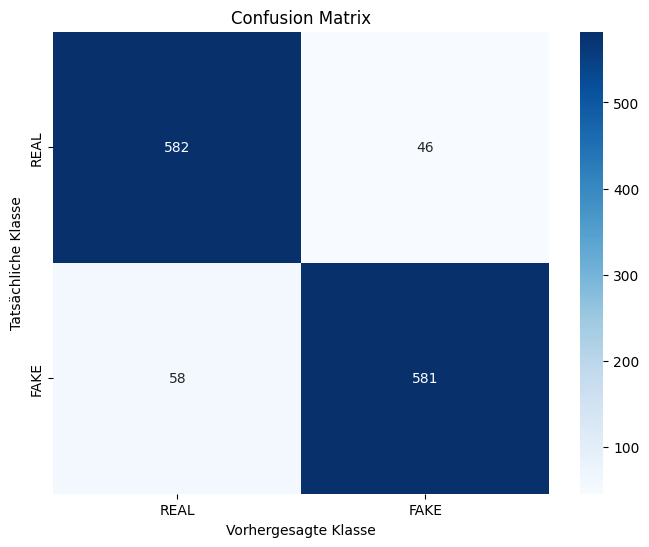

Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92       628
         1.0       0.93      0.91      0.92       639

    accuracy                           0.92      1267
   macro avg       0.92      0.92      0.92      1267
weighted avg       0.92      0.92      0.92      1267



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Berechnen der Confusion Matrix
cm = confusion_matrix(y_test, predicted)

# Darstellung der Confusion Matrix mit seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=["REAL", "FAKE"], yticklabels=["REAL", "FAKE"])
plt.xlabel("Vorhergesagte Klasse")
plt.ylabel("Tatsächliche Klasse")
plt.title("Confusion Matrix")
plt.show()
from sklearn.metrics import classification_report

# Berechnen der Klassifikationsbericht
report = classification_report(y_test, predicted)

# Ausgabe des Klassifikationsberichts
print("Classification Report:")
print(report)


Der Klassifikationsbericht zeigt, dass das Modell eine hohe Leistung sowohl bei der Vorhersage von Fake-Nachrichten (Klasse 0) als auch bei der Vorhersage von echten Nachrichten (Klasse 1) aufweist. Die Genauigkeit für beide Klassen liegt bei etwa 92%, was darauf hinweist, dass das Modell in ähnlichem Maße sowohl Fake- als auch echte Nachrichten korrekt klassifiziert.

Die Precision (Präzision) misst das Verhältnis der korrekt positiv vorhergesagten Instanzen zur Gesamtzahl der vorhergesagten positiven Instanzen. In diesem Fall beträgt die Precision für beide Klassen etwa 92%, was bedeutet, dass die meisten als positiv vorhergesagten Instanzen tatsächlich positiv waren.

Der Recall (Rückruf) misst das Verhältnis der korrekt positiv vorhergesagten Instanzen zur Gesamtzahl der tatsächlich positiven Instanzen. Auch hier liegt der Recall für beide Klassen bei etwa 92%, was darauf hinweist, dass das Modell die meisten tatsächlich positiven Instanzen korrekt erfasst hat.

Der F1-Score ist das harmonische Mittel zwischen Precision und Recall und berücksichtigt sowohl False Positives als auch False Negatives. Mit einem F1-Score von etwa 92% für beide Klassen zeigt das Modell eine ausgewogene Leistung in Bezug auf Precision und Recall.

Insgesamt deutet der Klassifikationsbericht darauf hin, dass das Modell eine hohe Genauigkeit und Zuverlässigkeit bei der Klassifizierung von Nachrichten in echte und Fake-Kategorien aufweist.